In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report
from datetime import datetime
from more_itertools import ilen
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import normaltest

In [2]:
train_df = pd.read_csv(os.path.join('./train_merge', 'train_data.csv'))
test_df = pd.read_csv(os.path.join('./test_merge', 'test_data.csv'))  

train_df_without_names = pd.concat([train_df.iloc[:, 4:20], train_df.iloc[:, 21:]], axis=1)
test_df_without_names = pd.concat([test_df.iloc[:, 4:20], test_df.iloc[:, 21:]], axis=1)

train_df_with_names = pd.concat([train_df.iloc[:, 3:20], train_df.iloc[:, 20:]], axis=1)
test_df_with_names = pd.concat([test_df.iloc[:, 3:20], test_df.iloc[:, 20:]], axis=1)

In [3]:
train_df_with_names

NAME_AWAY  away_firstdowns  away_rush  away_rush_yards  away_rushtds  \
0          CMU               16         30              152             3   
1         BUFF               26         39              215             1   
2         MTSU               27         33              137             3   
3         OHIO               23         43              282             3   
4          CIT               10         54              155             0   
...        ...              ...        ...              ...           ...   
4035       USU               11         25              109             0   
4036       WKU               16         27               94             0   
4037      SJSU               16         29              116             2   
4038       MIA               30         38              194             0   
4039      TULN               24         34              277             2   

      away_competions  away_pass_att  away_pass_yards  away_pass_td  \
0                  15             23              298             2   
1                  16             28              350             4   
2                  27             46              294             1   
3                  10             23              113             1   
4                   1              8               61             0   
...               ...            ...              ...           ...   
4035               16             34              101             1   
4036               19             40              163             0   
4037               18             28              182             2   
4038               32             42              431             5   
4039               22             34              216             3   

      away_pass_int  ...  home_pass_td  home_pass_int  home_total_yards  \
0                 1  ...             2              1               494   
1                 1  ...             2              1               337   
2                 0  ...             5              0               538   
3                 2  ...             4              0               443   
4                 2  ...             5              0               662   
...             ...  ...           ...            ...               ...   
4035              0  ...             3              0               542   
4036              0  ...             0              1               273   
4037              1  ...             0              1               362   
4038              0  ...             3              1               410   
4039              1  ...             3              0               386   

      home_fumbles  home_fumbles_lost  home_turnovers  home_penalities  \
0                2                  1               2               10   
1                2                  0               1                2   
2                3                  2               2                7   
3                1                  0               0               16   
4                2                  0               0                4   
...            ...                ...             ...              ...   
4035             1                  0               0               10   
4036             0                  0               1                2   
4037             2                  2               3                4   
4038             1                  0               1                8   
4039             2                  1               1                4   

     home_penality_yards  home_points  Home_Win  
0                    109           23     False  
1                     10           24     False  
2                     69           41      True  
3                    167           37      True  
4                     30           61      True  
...                  ...          ...       ...  
4035                  74           34      True  
4036                  25           10

In [4]:
test_df_with_names

NAME_AWAY  away_firstdowns  away_rush  away_rush_yards  away_rushtds  \
0         NIU               19         37              126             2   
1        NMSU               17         40              187             2   
2         LAM               16         43              104             1   
3         HOW               24         40              168             3   
4    Vis_stat               13         28               85             1   
..        ...              ...        ...              ...           ...   
905        KU               11         22               56             2   
906      WASH               28         32              102             1   
907       FAU               20         38              165             1   
908       KSU               15         30              158             2   
909       TOL               22         38              198             2   

     away_competions  away_pass_att  away_pass_yards  away_pass_td  \
0                 18             31              259             3   
1                  8             25              111             0   
2                 13             33              148             0   
3                 28             37              250             0   
4                 11             26              210             1   
..               ...            ...              ...           ...   
905               16             27              232             1   
906               36             51              374             2   
907               12             20              164             1   
908               14             23              232             2   
909               25             48              249             1   

     away_pass_int  ...  home_pass_td  home_pass_int  home_total_yards  \
0                1  ...             4              1               429   
1                1  ...             1              0               261   
2                1  ...             3              2               453   
3                1  ...             0              1               424   
4                2  ...             5              0               630   
..             ...  ...           ...            ...               ...   
905              0  ...             1              2               437   
906              0  ...             3              0               306   
907              0  ...             1              1               412   
908              2  ...             3              0               495   
909              4  ...             1              0               398   

     home_fumbles  home_fumbles_lost  home_turnovers  home_penalities  \
0               1                  1               2                4   
1               3                  2               2                5   
2               1                  1               3                7   
3               0                  0               1                3   
4               1                  1               1                3   
..            ...                ...             ...              ...   
905             1                  1               3                3   
906             1                  0               0                2   
907             1                  0               1                9   
908             1                  0               0                3   
909             1                  1               1                4   

    home_penality_yards  home_points  Home_Win  
0                    56           38      True  
1                    55           20      True  
2                    67           45      True  
3                    40           42      True  
4                    20           59      True  
..                  ...          ...       ...  
905                  30           35      True  
906                  15           21     False  
907                  56           24      T

In [5]:
train_df_with_important_features = train_df_without_names[['away_total_yards', 'home_total_yards', 'home_rush_yards', 'away_rush_yards', 'home_firstdowns', 'away_competions', 'home_competions', 'away_firstdowns', 'away_rush', 'home_rush', 'away_points', 'away_pass_yards', 'home_pass_yards', 'away_pass_att', 'home_pass_att', 'away_penality_yards', 'home_penality_yards', 'home_points', 'Home_Win']]
test_df_with_important_features = test_df_without_names[['away_total_yards', 'home_total_yards', 'home_rush_yards', 'away_rush_yards', 'home_firstdowns', 'away_competions', 'home_competions', 'away_firstdowns', 'away_rush', 'home_rush', 'away_points', 'away_pass_yards', 'home_pass_yards', 'away_pass_att', 'home_pass_att', 'away_penality_yards', 'home_penality_yards', 'home_points', 'Home_Win']]
train_df_with_important_features

away_total_yards  home_total_yards  home_rush_yards  away_rush_yards  \
0                  450               494              174              152   
1                  565               337              194              215   
2                  431               538               53              137   
3                  395               443              121              282   
4                  216               662              183              155   
...                ...               ...              ...              ...   
4035               210               542              121              109   
4036               257               273              165               94   
4037               298               362              101              116   
4038               625               410              131              194   
4039               493               386               35              277   

      home_firstdowns  away_competions  home_competions  away_firstdowns  \
0                  25               15               16               16   
1                  18               16               15               26   
2                  25               27               39               27   
3                  18               10               22               23   
4                  27                1               31               10   
...               ...              ...              ...              ...   
4035               27               16               37               11   
4036               18               19                7               16   
4037               20               18               21               16   
4038               24               32               20               30   
4039               20               22               27               24   

      away_rush  home_rush  away_points  away_pass_yards  home_pass_yards  \
0            30         47           42              298              320   
1            39         37           40              350              143   
2            33         33           38              294              485   
3            43         32           34              113              322   
4            54         26            3               61              479   
...         ...        ...          ...              ...              ...   
4035         25         28            9              101              421   
4036         27         45            6              163              108   
4037         29         45           28              182              261   
4038         38         34           44              431              279   
4039         34         29           38              216              351   

      away_pass_att  home_pass_att  away_penality_yards  home_penality_yards  \
0                23             30                   60                  109   
1                28             29                   47                   10   
2                46             54                   68                   69   
3                23             38                   19                  167   
4                 8             41                   41                   30   
...             ...            ...                  ...                  ...   
4035             34             54                   52                   74   
4036             40             17                   50                   25   
4037             28             30                   15                   40   
4038             42             29                  101                   78   
4039             34             43                   65                   23   

      home_points  Home_Win  
0              23     False  
1              24     False  
2              41      True  
3              37      True  
4              61      True  
...           ...       ...  
4035           34      True  
4036           10      True  


In [6]:
test_df_with_important_features

away_total_yards  home_total_yards  home_rush_yards  away_rush_yards  \
0                 385               429              107              126   
1                 298               261              108              187   
2                 252               453              208              104   
3                 418               424              205              168   
4                 295               630              180               85   
..                ...               ...              ...              ...   
905               288               437              273               56   
906               476               306               61              102   
907               329               412              234              165   
908               390               495              215              158   
909               447               398              153              198   

     home_firstdowns  away_competions  home_competions  away_firstdowns  \
0                 23               18               19               19   
1                 17                8               12               17   
2                 23               13               22               16   
3                 20               28               17               24   
4                 28               11               28               13   
..               ...              ...              ...              ...   
905               28               16               17               11   
906               18               36               21               28   
907               17               12               16               20   
908               26               14               17               15   
909               19               25               22               22   

     away_rush  home_rush  away_points  away_pass_yards  home_pass_yards  \
0           37         37           35              259              322   
1           40         31           13              111              153   
2           43         30           16              148              245   
3           40         27           20              250              219   
4           28         37           17              210              450   
..         ...        ...          ...              ...              ...   
905         22         57           23              232              164   
906         32         31           28              374              245   
907         38         41           21              164              178   
908         30         56           28              232              280   
909         38         38           27              249              245   

     away_pass_att  home_pass_att  away_penality_yards  home_penality_yards  \
0               31             32                   84                   56   
1               25             27                   85                   55   
2               33             36                   76                   67   
3               37             28                   43                   40   
4               26             34                   20                   20   
..             ...            ...                  ...                  ...   
905             27             26                   31                   30   
906             51             34                   65                   15   
907             20             26                   25                   56   
908             23             26                   35                   30   
909             48             39                   30                   35   

     home_points  Home_Win  
0             38      True  
1             20      True  
2             45      True  
3             42      True  
4             59      True  
..           ...       ...  
905           35      True  
906           21     False  
907           24      True  
908           38      True 

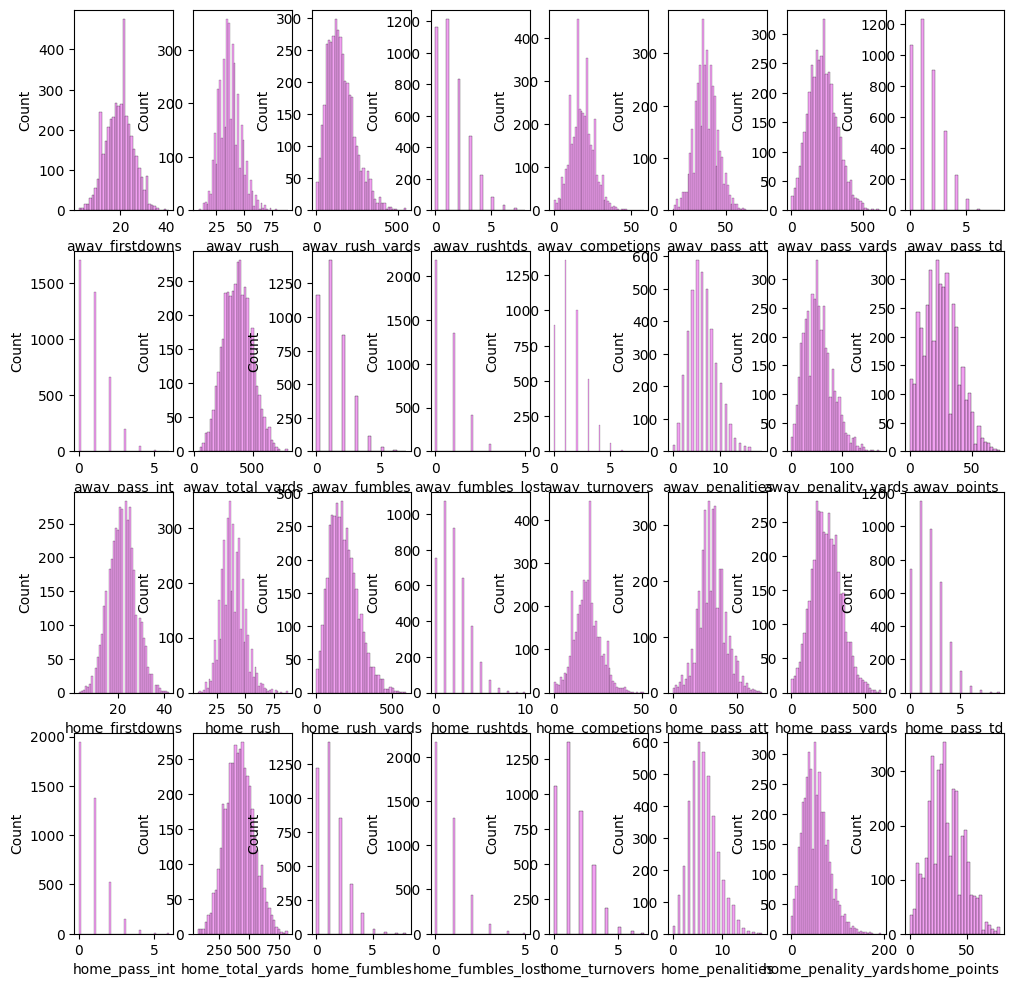

In [7]:
# Does the values from train_df obey the normal distribution law?
# Should we accept or reject the assumption of values's normal distribution?
n_rows=4
n_cols=8

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,12))

for i, column in enumerate(train_df_without_names.iloc[:, :-1].columns):
    # sns.distplot(train_df_without_names[column], color='violet', ax=axes[i//n_cols,i%n_cols], hist=False)
    sns.histplot(train_df_without_names[column], color='violet', ax=axes[i//n_cols,i%n_cols])

In [8]:
# Does the values from test_df obey the normal distribution law?
# Should we accept or reject the assumption of values's normal distribution?
n_rows=4
n_cols=8

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,12))

for i, column in enumerate(test_df_without_names.iloc[:, :-1].columns):
    sns.histplot(test_df_without_names[column], color='green', ax=axes[i//n_cols,i%n_cols])

train_df_important_features

test_df_important_features

In [9]:
# Does the values from train_df obey the normal distribution law?
# Should we accept or reject the assumption of values's normal distribution?
n_rows=3
n_cols=6

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,12))

for i, column in enumerate(train_df_with_important_features.iloc[:, :-1].columns):
    sns.histplot(train_df_with_important_features[column], color='grey', ax=axes[i//n_cols,i%n_cols])

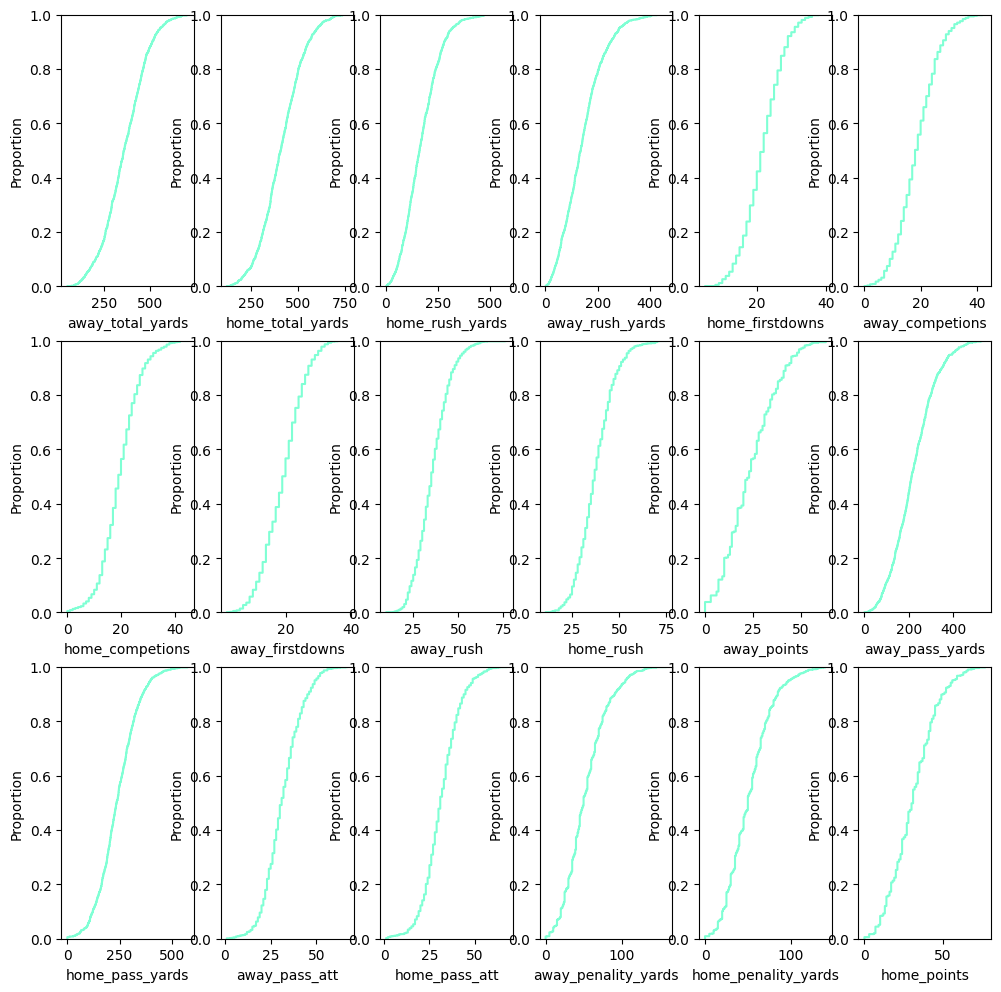

In [10]:
# Does the values from train_df obey the normal distribution law?
# Should we accept or reject the assumption of values's normal distribution?
n_rows=3
n_cols=6

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,12))

for i, column in enumerate(test_df_with_important_features.iloc[:, :-1].columns):
    sns.ecdfplot(test_df_with_important_features[column], color='aquamarine', ax=axes[i//n_cols,i%n_cols])

train_df_important_features

test_df_important_features

In [11]:
n_rows=3
n_cols=6

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,12))

for i, column in enumerate(train_df_with_important_features.iloc[:, :-1].columns):
    qqplot(train_df_with_important_features[column], ax=axes[i//n_cols,i%n_cols], fit=True, line="45")

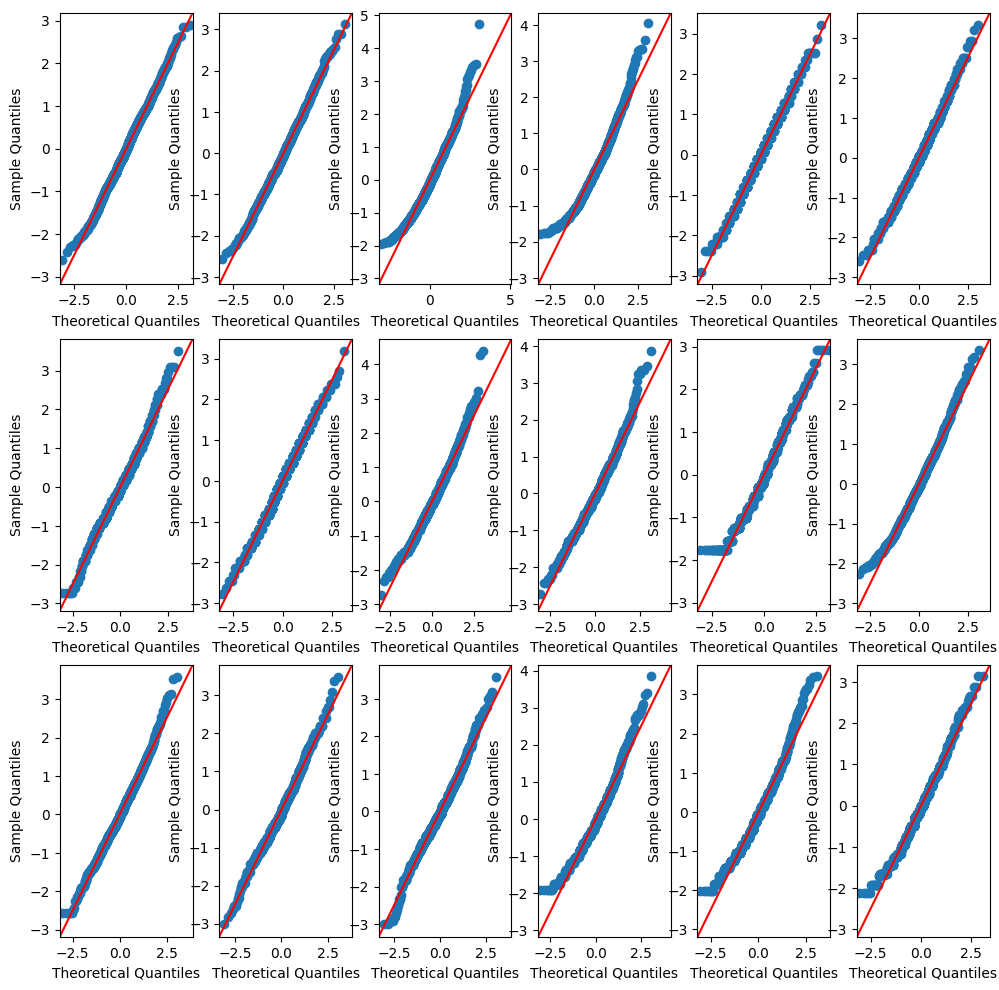

In [12]:
n_rows=3
n_cols=6

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,12))

for i, column in enumerate(test_df_with_important_features.iloc[:, :-1].columns):
    qqplot(test_df_with_important_features[column], ax=axes[i//n_cols,i%n_cols], fit=True, line="45")

Let's continue research. Let's move on to statistical criteria. We will use the Shapiro-Wilk and D'Agostino test to finally accept or reject the assumption of a normal distribution.

If the value of pvalue>alpha, then the hypothesis H0 is accepted, in case of occurrence, i.e. if, pvalue<alpha, then the H1 hypothesis arises, i.e. that the sample does not follow the normal law.
Set the significance level to alpha=0.05.

In [13]:
#only here is following the normal law; only with them can be applied StandartScalar
print(shapiro(train_df_with_important_features.home_firstdowns))
print(normaltest(train_df_with_important_features.home_firstdowns))
print(shapiro(test_df_with_important_features.home_firstdowns))
print(normaltest(test_df_with_important_features.home_firstdowns))

ShapiroResult(statistic=0.9968540668487549, pvalue=1.8077210484079842e-07)
NormaltestResult(statistic=3.2496593212996174, pvalue=0.1969452198679004)
ShapiroResult(statistic=0.9957619309425354, pvalue=0.01343210507184267)
NormaltestResult(statistic=3.0411457838457703, pvalue=0.21858662456307232)


In [14]:
train_test_without_names = pd.concat([train_df_without_names, test_df_without_names])
train_test_with_names = pd.concat([train_df_with_names, test_df_with_names])
train_test_with_important_features = pd.concat([train_df_with_important_features, test_df_with_important_features])

In [15]:
train_test_with_important_features

away_total_yards  home_total_yards  home_rush_yards  away_rush_yards  \
0                 450               494              174              152   
1                 565               337              194              215   
2                 431               538               53              137   
3                 395               443              121              282   
4                 216               662              183              155   
..                ...               ...              ...              ...   
905               288               437              273               56   
906               476               306               61              102   
907               329               412              234              165   
908               390               495              215              158   
909               447               398              153              198   

     home_firstdowns  away_competions  home_competions  away_firstdowns  \
0                 25               15               16               16   
1                 18               16               15               26   
2                 25               27               39               27   
3                 18               10               22               23   
4                 27                1               31               10   
..               ...              ...              ...              ...   
905               28               16               17               11   
906               18               36               21               28   
907               17               12               16               20   
908               26               14               17               15   
909               19               25               22               22   

     away_rush  home_rush  away_points  away_pass_yards  home_pass_yards  \
0           30         47           42              298              320   
1           39         37           40              350              143   
2           33         33           38              294              485   
3           43         32           34              113              322   
4           54         26            3               61              479   
..         ...        ...          ...              ...              ...   
905         22         57           23              232              164   
906         32         31           28              374              245   
907         38         41           21              164              178   
908         30         56           28              232              280   
909         38         38           27              249              245   

     away_pass_att  home_pass_att  away_penality_yards  home_penality_yards  \
0               23             30                   60                  109   
1               28             29                   47                   10   
2               46             54                   68                   69   
3               23             38                   19                  167   
4                8             41                   41                   30   
..             ...            ...                  ...                  ...   
905             27             26                   31                   30   
906             51             34                   65                   15   
907             20             26                   25                   56   
908             23             26                   35                   30   
909             48             39                   30                   35   

     home_points  Home_Win  
0             23     False  
1             24     False  
2             41      True  
3             37      True  
4             61      True  
..           ...       ...  
905           35      True  
906           21     False  
907           24      True  
908           38      True 

In [16]:
# Making sparse matrix (for easier/quicklier calculating) sparse_with_important_features_final
train_test_sparse_with_important_features = csr_matrix((np.ones(train_test_with_important_features.values.size, dtype=int),
                               train_test_with_important_features.values.reshape(-1),
                               np.arange(train_test_with_important_features.values.shape[0] + 1) * train_test_with_important_features.values.shape[1]))[:, 1:]
X_train_sparse_with_important_features = train_test_sparse_with_important_features[:train_df_with_important_features.shape[0]]
X_test_sparse_with_important_features = train_test_sparse_with_important_features[train_df_with_important_features.shape[0]:]
y = train_df_with_important_features['Home_Win'].values
y_test = test_df_with_important_features['Home_Win'].values
print(X_train_sparse_with_important_features.shape[0], X_train_sparse_with_important_features.shape[1], X_test_sparse_with_important_features.shape[0], X_test_sparse_with_important_features.shape[1])

4040 826 910 826


In [17]:
train_share_with_important_features = int(.7 * X_train_sparse_with_important_features.shape[0])
X_train, y_train = X_train_sparse_with_important_features[:train_share_with_important_features, :], y[:train_share_with_important_features]
X_valid, y_valid  = X_train_sparse_with_important_features[train_share_with_important_features:, :], y[train_share_with_important_features:]

In [18]:
#logistic regression trained with stochastic gradient descent
sgd_logit = SGDClassifier(loss='log_loss', random_state=17, n_jobs=-1)

# ALSO SHOULD BE TRIED AND MODELS COMPARED BETWEEN EACH OTHER 
# logreg = LogisticRegression(random_state=17, parameters(?))
# rf_clf = RandomForestClassifier(parameters(?))
# knn_clf = KNeighborsClassifier(parameters(?))
# svc_clf = SVC(parameters(?))
# gb_clf = GradientBoostingClassifier(random_state=SEED, parameters(?))

sgd_logit.fit(X_train, y_train)

SGDClassifier(loss='log_loss', n_jobs=-1, random_state=17)

Make a prediction in terms of the predicted probabilities that this is True (Home_Win) on a delayed sample (X_test, y_test).*

In [19]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)

ROC AUC describes the relationship between the sensitivity of the model (TPR, or true positives rate - the proportion of true positive examples) and its specificity (described in terms of the proportion of false positives: 1-FPR).

In [20]:
print(round(roc_auc_score(y_valid, logit_valid_pred_proba[:, 1]), 3))

0.994


Make a prediction in terms of predicted right probabilities for the test set using the same sgd_logit trained on the entire training set (rather than 70%).

In [21]:
sgd_logit.fit(X_train_sparse_with_important_features, y)
logit_valid_pred_proba = sgd_logit.predict_proba(X_test_sparse_with_important_features)
print(round(roc_auc_score(y_test, logit_valid_pred_proba[:, 1]), 3))

0.995


In [22]:
params = {
    'loss': ['modified_huber'],
    'penalty': ['l1'],
    'alpha': [0.1],
    'max_iter': np.arange(100, 1000, 100)
}
sgd_logit = SGDClassifier(n_jobs=-1, random_state=17)
grid = GridSearchCV(sgd_logit, param_grid=params, cv=10)
grid.fit(X_train_sparse_with_important_features, y)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
grid.best_estimator_.fit(X_train_sparse_with_important_features, y)
best_logit_valid_pred_proba = grid.best_estimator_.predict_proba(X_train_sparse_with_important_features)
y_pred = grid.best_estimator_.predict(X_valid)
# Print the results
print("Accuracy on the test set:", accuracy_score(y_valid, y_pred))
print("Classification Report:")
print(classification_report(y_valid, y_pred))

{'alpha': 0.1, 'loss': 'modified_huber', 'max_iter': 100, 'penalty': 'l1'}
0.9975247524752474
SGDClassifier(alpha=0.1, loss='modified_huber', max_iter=100, n_jobs=-1,
              penalty='l1', random_state=17)
Accuracy on the test set: 0.9966996699669967
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       458
        True       0.99      1.00      1.00       754

    accuracy                           1.00      1212
   macro avg       1.00      1.00      1.00      1212
weighted avg       1.00      1.00      1.00      1212



In [23]:
#OneHotEncoding for names of commands
def ohe(series):
    return OneHotEncoder().fit_transform(series.values.reshape(-1, 1))

In [24]:
ohe_train_away = ohe(train_df_with_names['NAME_AWAY'])
ohe_test_away = ohe(test_df_with_names['NAME_AWAY'])

ohe_train_home = ohe(train_df_with_names['NAME_HOME'])
ohe_test_home = ohe(test_df_with_names['NAME_HOME'])

concatenate sparse matrixes (from previous) with decoded name_columns. We get sparse matrixes, whose demension of dense matrixes would be 18 (main features columns) + 2 (decoded name_columns) 

In [25]:
X_train_sparse_final = hstack([train_test_sparse_with_important_features[:train_df_with_important_features.shape[0]], ohe_train_away, ohe_train_home]).tocsr()
X_test_sparse_final = hstack([train_test_sparse_with_important_features[train_df_with_important_features.shape[0]:], ohe_test_away, ohe_test_home]).tocsr()

In [43]:
train_share_final = int(.7 * X_train_sparse_final.shape[0])
X_train, y_train = X_train_sparse_final[:train_share_final, :], y[:train_share_final]
X_valid, y_valid  = X_train_sparse_final[train_share_final:, :], y[train_share_final:]

In [27]:
sgd_logit_final = SGDClassifier(loss='log_loss', random_state=17, n_jobs=-1)
sgd_logit_final.fit(X_train, y_train)

SGDClassifier(loss='log_loss', n_jobs=-1, random_state=17)

In [28]:
logit_valid_pred_proba_final = sgd_logit_final.predict_proba(X_valid)

In [29]:
print(round(roc_auc_score(y_valid, logit_valid_pred_proba_final[:, 1]), 3))

0.996


In [44]:
params = {
    'loss': ['modified_huber'],
    'penalty': ['l1'],
    'alpha': [0.1],
    'max_iter': np.arange(100, 1000, 100)
}
sgd_logit = SGDClassifier(n_jobs=-1, random_state=17)
grid = GridSearchCV(sgd_logit, param_grid=params, cv=10)
grid.fit(X_train_sparse_final, y)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
grid.best_estimator_.fit(X_train_sparse_final, y)
best_logit_valid_pred_proba = grid.best_estimator_.predict_proba(X_train_sparse_final)
y_pred = grid.best_estimator_.predict(X_valid)
# Print the results
print("Accuracy on the test set:", accuracy_score(y_valid, y_pred))
print("Classification Report:")
print(classification_report(y_valid, y_pred))

{'alpha': 0.1, 'loss': 'modified_huber', 'max_iter': 100, 'penalty': 'l1'}
0.9975247524752474
SGDClassifier(alpha=0.1, loss='modified_huber', max_iter=100, n_jobs=-1,
              penalty='l1', random_state=17)
Accuracy on the test set: 0.9966996699669967
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       458
        True       0.99      1.00      1.00       754

    accuracy                           1.00      1212
   macro avg       1.00      1.00      1.00      1212
weighted avg       1.00      1.00      1.00      1212



In [31]:
#During game (for example) collect and insert game parametes, that already have appeared
away_total_yards = 200
home_total_yards = 100
home_rush_yards = 10
away_rush_yards = 11
home_firstdowns = 8
away_competions = 9
home_competions = 8
away_firstdowns = 10
away_rush = 20
home_rush = 10
away_points = 0
away_pass_yards = 80
home_pass_yards = 100
away_pass_att = 15
home_pass_att = 13
away_penality_yards = 4
home_penality_yards = 2
home_points = 0
real_game_list = [[away_total_yards, home_total_yards, home_rush_yards, away_rush_yards, home_firstdowns, away_competions, home_competions, away_firstdowns, away_rush, home_rush, away_points, away_pass_yards, home_pass_yards, away_pass_att, home_pass_att, away_penality_yards, home_penality_yards, home_points]]

In [32]:
real_game_df = pd.DataFrame(real_game_list, columns=['away_total_yards', 'home_total_yards', 'home_rush_yards', 'away_rush_yards', 'home_firstdowns', 'away_competions', 'home_competions', 'away_firstdowns', 'away_rush', 'home_rush', 'away_points', 'away_pass_yards', 'home_pass_yards', 'away_pass_att', 'home_pass_att', 'away_penality_yards', 'home_penality_yards', 'home_points'])

In [33]:
real_game_df

away_total_yards  home_total_yards  home_rush_yards  away_rush_yards  \
0               200               100               10               11   

   home_firstdowns  away_competions  home_competions  away_firstdowns  \
0                8                9                8               10   

   away_rush  home_rush  away_points  away_pass_yards  home_pass_yards  \
0         20         10            0               80              100   

   away_pass_att  home_pass_att  away_penality_yards  home_penality_yards  \
0             15             13                    4                    2   

   home_points  
0            0